Descripción estadística general:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012

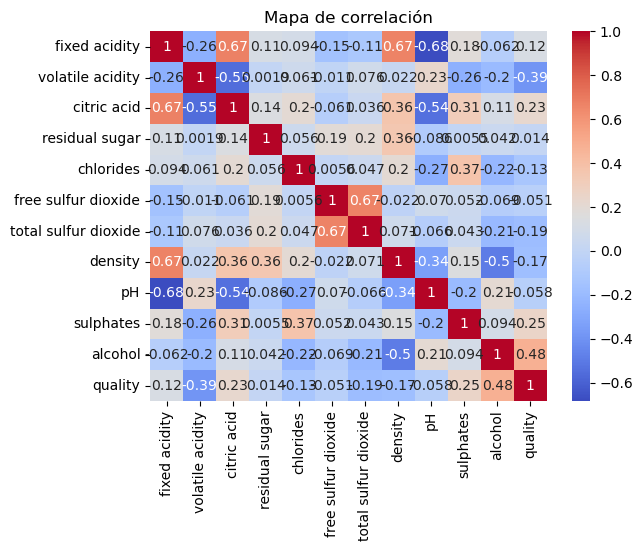

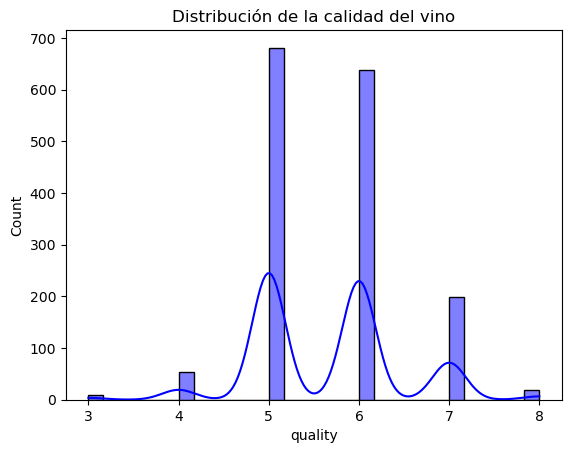

Características seleccionadas:
[ 1  2  6  9 10]
MAE (Regresión Lineal): 0.503530441552438
Exactitud (Regresión Logística): 0.859375
MSE (Árbol de Decisión): 0.5803749859009607


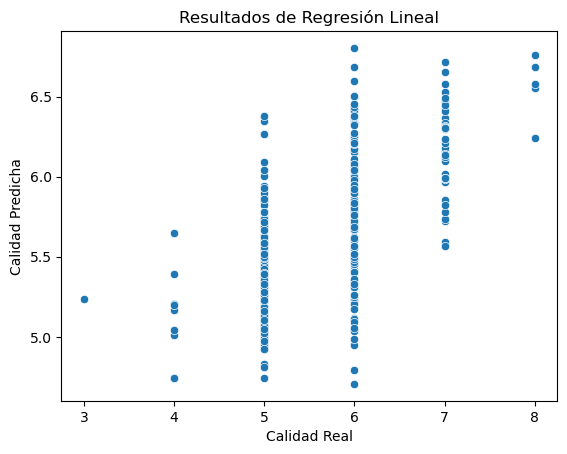

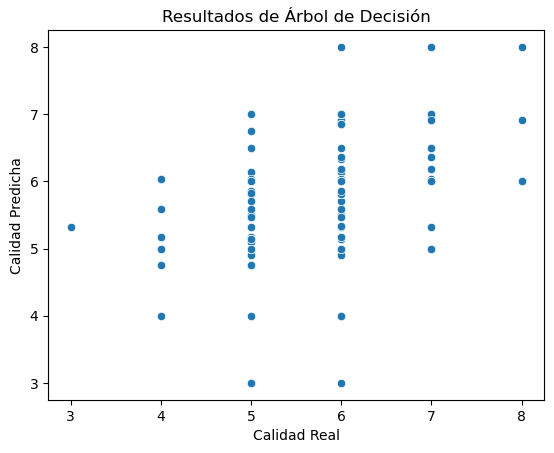

Análisis completado. Revisa las gráficas y métricas para más detalles.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, recall_score, f1_score, mean_squared_error

# Paso 1: Lectura del dataset
file_path = r"C:\Users\ruben\Desktop\Red Wine Quality\winequality-red.csv"
data = pd.read_csv(file_path)

# Paso 2: Análisis exploratorio de datos (EDA)
print("Descripción estadística general:")
print(data.describe())

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()

sns.histplot(data['quality'], kde=True, color='blue')
plt.title('Distribución de la calidad del vino')
plt.show()

# Paso 3: Preprocesamiento de datos
data = data.dropna()  # Eliminar valores faltantes (si los hay)
X = data.drop(columns=['quality'])  # Variables predictoras
y = data['quality']  # Variable objetivo

# Paso 4: Selección de características
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
print("Características seleccionadas:")
print(selector.get_support(indices=True))

# Paso 5: Dividir el conjunto de datos en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 6: Entrenar modelos y configurar hiperparámetros

# Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("MAE (Regresión Lineal):", mae_linear)

# Regresión Logística
threshold = y.median()  # Convertir calidad en clasificación: alta/baja
y_class = (y > threshold).astype(int)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_class, y_train_class)
y_pred_logistic = logistic_model.predict(X_test_class)
accuracy_logistic = accuracy_score(y_test_class, y_pred_logistic)
print("Exactitud (Regresión Logística):", accuracy_logistic)

# Árbol de Decisión
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("MSE (Árbol de Decisión):", mse_tree)

# Paso 7: Visualización de resultados
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.title('Resultados de Regresión Lineal')
plt.xlabel('Calidad Real')
plt.ylabel('Calidad Predicha')
plt.show()

sns.scatterplot(x=y_test, y=y_pred_tree)
plt.title('Resultados de Árbol de Decisión')
plt.xlabel('Calidad Real')
plt.ylabel('Calidad Predicha')
plt.show()

# Paso 8: Documentar e interpretar resultados
print("Análisis completado. Revisa las gráficas y métricas para más detalles.")